# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0.5, 1.0, 'Hospital Charges')

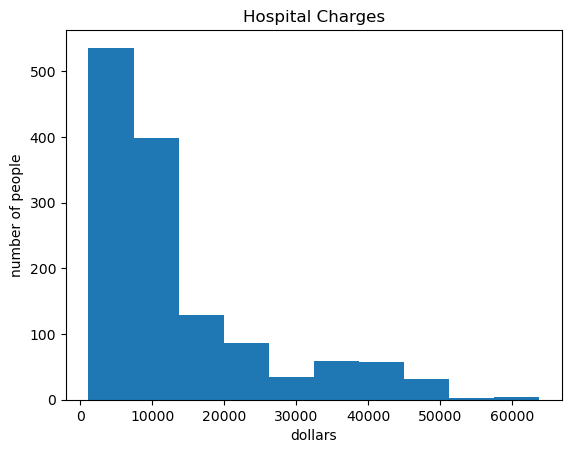

In [4]:
plt.hist(medical.charges)
plt.ylabel('number of people')
plt.xlabel('dollars')
plt.title('Hospital Charges')

In [5]:
pop_mean = medical.charges.mean()
print(pop_mean)

13270.422265141257


In [6]:
pop_std = medical.charges.std()
print(pop_std)

12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  We have enough data from this sample to take further samples from the original sample and make a distribution of the means we get. We would expect this distribution to be normal according to the central limit theorem and therefore could calculate a z-score(since the size is large enough we dont need a T-score) the standard error, and the margin of error of the sampled means from the original sample. Using this margin of error, we can then estimate how likely it is that the mean hospital price we have from our original sample ($13270) lies within a set confidence interval and show how likely it is that this value is representitive of the entire population.  

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided interval at 95 % confidence would be more appropriate since we only care that the mean hospital bill hasnt dropped below $12,000. Essentially we just need to find the confidence interval that the mean isnt lower than $12,000.

In [7]:
def samples(n, x):
    return [medical.charges.sample(n).mean() for i in range(x)]


In [8]:
samples = samples(50, 10000)

(array([  13.,   66.,  269.,  635., 1215., 1707., 1960., 1664., 1249.,
         678.,  344.,  138.,   49.,   10.,    3.]),
 array([ 7881.8235164 ,  8694.12364895,  9506.42378149, 10318.72391404,
        11131.02404659, 11943.32417913, 12755.62431168, 13567.92444423,
        14380.22457677, 15192.52470932, 16004.82484187, 16817.12497441,
        17629.42510696, 18441.72523951, 19254.02537205, 20066.3255046 ]),
 <BarContainer object of 15 artists>)

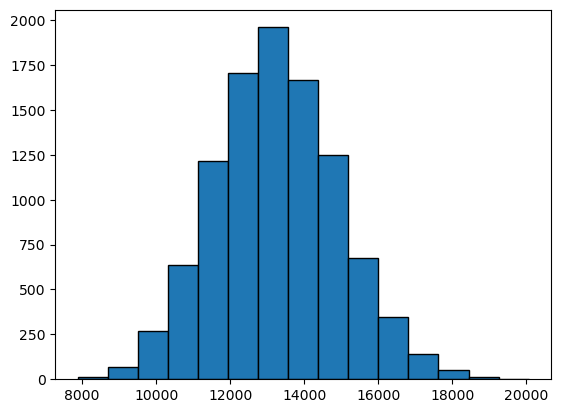

In [9]:
plt.hist(samples,bins=15, edgecolor='black', label='means distribution')

In [10]:
samples_mean = np.mean(samples)
samples_std = np.std(samples)
z_value = norm.ppf(0.95)
standard_error = pop_std/ np.sqrt(10000)
margin_error = standard_error * z_value
confidence_interval_lower = samples_mean - margin_error

print('standard_error',standard_error)
print('samples mean',samples_mean)
print('std',samples_std)
print('margin_error',margin_error)
print('conf_interval',confidence_interval_lower)


standard_error 121.10011236693994
samples mean 13294.7851453226
std 1692.458501298152
margin_error 199.19195905099198
conf_interval 13095.593186271608


This administrator shouldnt be concerned. The data suggests with 95% confidence that the true mean of bills is at least 13087 which is slightly higher than the mean of 13000

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null Hypothesis - Patients with and without insurance pay the same prices

Alternative hypothesis - there is a difference in how much patients with and without insurance pay.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
insurance = medical[medical.insuranceclaim == 1]
insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
4,32,1,28.88,0,0,1,3866.8552,1
6,46,0,33.44,1,0,2,8240.5896,1
10,25,1,26.22,0,0,0,2721.3208,1


In [12]:
insurance_mean = insurance.charges.mean()

In [13]:
insurance_std = insurance.charges.std()

In [14]:
no_insurance = medical[medical.insuranceclaim == 0]
no_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0


In [16]:
no_insurance_mean = no_insurance.charges.mean()

In [17]:
no_insurance_std = no_insurance.charges.std()

In [25]:



n0 = len(insurance.charges)
n1 = len(no_insurance.charges)
s0 = insurance_std 
s1 = no_insurance_std 

sp = np.sqrt(((n0 - 1) * s0 ** 2 + (n1 - 1) * s1 ** 2) / (n0 + n1 - 2))


t_stat = (insurance_mean - no_insurance_mean) / np.sqrt((sp ** 2 / n0) + (sp ** 2 / n1))


In [26]:
print(t_stat)

11.893299030876715


In [28]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(insurance.charges,no_insurance.charges)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: 11.893299030876712, p-value: 4.461230231620717e-31


Due to the extremelt small p Value, we can reject the null hypothesis and say that people with insurance likely pay more than those without insurance. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ You can use the scipy.stats.norm function to calculate this. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test